# Final Project
Objective: Predict adjusted salaries based on the determined predictors: Country, Age, Gender, Education Level, and Seniority Status 

**_Team 14: Micah, Morgan, Quentin, & Tony_**

## Data Import and Cleaning

In [1]:
# Load necessary libraries
install.packages("lmtest")
install.packages("mltools")
install.packages('ggplot2')
install.packages('caret')
library(caret)
library(ggplot2)
library(lmtest)
library(mltools)

The following package(s) will be installed:
- lmtest [0.9-40]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing lmtest ...                         OK [linked from cache]
The following package(s) will be installed:
- mltools [0.3.5]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing mltools ...                        OK [linked from cache]
The following package(s) will be installed:
- ggplot2 [3.5.1]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggplot2 ...                        OK [linked from cache]
The following package(s) will be installed:
- caret [6.0-9

Loading required package: ggplot2

Loading required package: lattice

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [2]:
# Loaded the data into datalab

data <- read.csv('Final Project Data.csv')
data
summary(data)
unique(data$Country)

Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race,Senior
<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>
32,Male,1,Software Engineer,5,90000,UK,White,0
28,Female,2,Data Analyst,3,65000,USA,Hispanic,0
45,Male,3,Manager,15,150000,Canada,White,1
36,Female,1,Sales Associate,7,60000,USA,Hispanic,0
52,Male,2,Director,20,200000,USA,Asian,0
29,Male,1,Marketing Analyst,2,55000,USA,Hispanic,0
42,Female,2,Product Manager,12,120000,USA,Asian,0
31,Male,1,Sales Manager,4,80000,China,Korean,0
26,Female,1,Marketing Coordinator,1,45000,China,Chinese,0


      Age           Gender          Education.Level  Job.Title        
 Min.   :21.00   Length:6684        Min.   :0.000   Length:6684       
 1st Qu.:28.00   Class :character   1st Qu.:1.000   Class :character  
 Median :32.00   Mode  :character   Median :1.000   Mode  :character  
 Mean   :33.61                      Mean   :1.622                     
 3rd Qu.:38.00                      3rd Qu.:2.000                     
 Max.   :62.00                      Max.   :3.000                     
 Years.of.Experience     Salary         Country              Race          
 Min.   : 0.000      Min.   :   350   Length:6684        Length:6684       
 1st Qu.: 3.000      1st Qu.: 70000   Class :character   Class :character  
 Median : 7.000      Median :115000   Mode  :character   Mode  :character  
 Mean   : 8.078      Mean   :115307                                        
 3rd Qu.:12.000      3rd Qu.:160000                                        
 Max.   :34.000      Max.   :250000            

[1] "UK"        "USA"       "Canada"    "China"     "Australia"

In terms of cleaning the data, we were very lucky to come across a data set that was already cleaned and ready to be used for this assignment. 

## Exploratory Data Analysis (EDA) 

In [3]:
# This is not the testing for the whole data set. So the low Adjusted R score is expected
# Looking at key relationships
options(scipen=999) #so we can see the zeros
attach(data)

# Define the formula for the regression model
formula <- Salary ~ Gender + Country 

# Train the linear regression model using the training data
model <- lm(formula, data = data)

# Display the summary of the model
summary(model)


Call:
lm(formula = formula, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-121507  -47392   -1128   47307  127608 

Coefficients:
              Estimate Std. Error t value            Pr(>|t|)    
(Intercept)   107642.2     1593.5  67.552 <0.0000000000000002 ***
GenderMale     13485.7     1287.9  10.471 <0.0000000000000002 ***
CountryCanada   1264.2     2032.6   0.622               0.534    
CountryChina    1107.0     2026.1   0.546               0.585    
CountryUK        957.8     2028.7   0.472               0.637    
CountryUSA     -1992.9     2019.7  -0.987               0.324    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52380 on 6678 degrees of freedom
Multiple R-squared:  0.01673,	Adjusted R-squared:  0.016 
F-statistic: 22.73 on 5 and 6678 DF,  p-value: < 0.00000000000000022


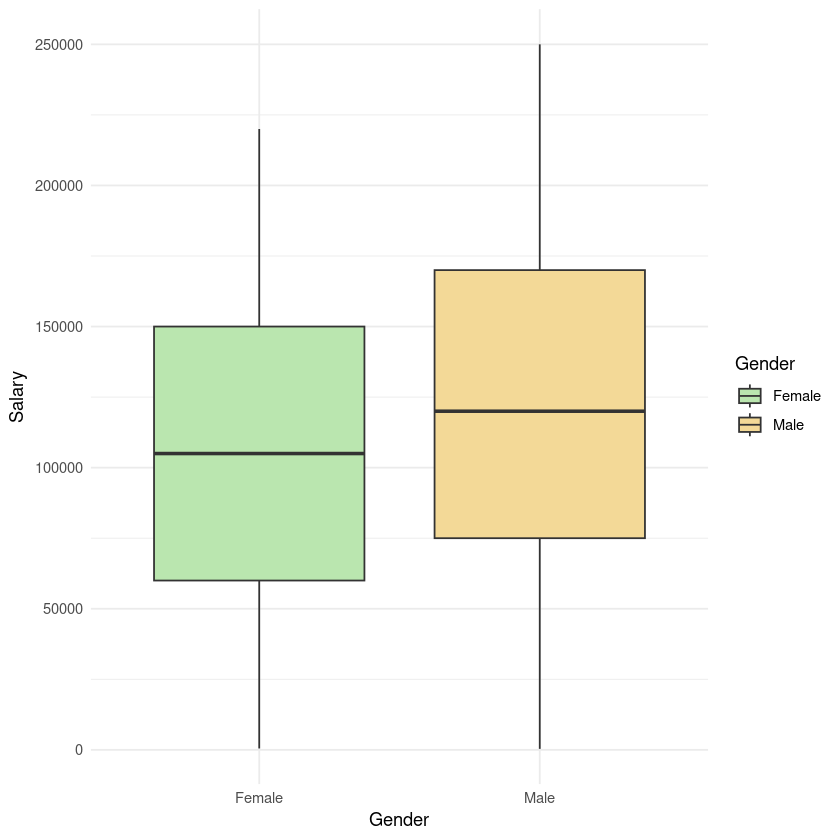

In [4]:
#Plotting Gender/Salary
bar_colors <- c("#bae6af", '#f3d997')

ggplot(data, aes(x = Gender, y = Salary)) +
  geom_boxplot(aes(fill = Gender)) +
  labs(y = "Salary", x = "Gender") +
  theme_minimal() +
  scale_fill_manual(values = bar_colors)

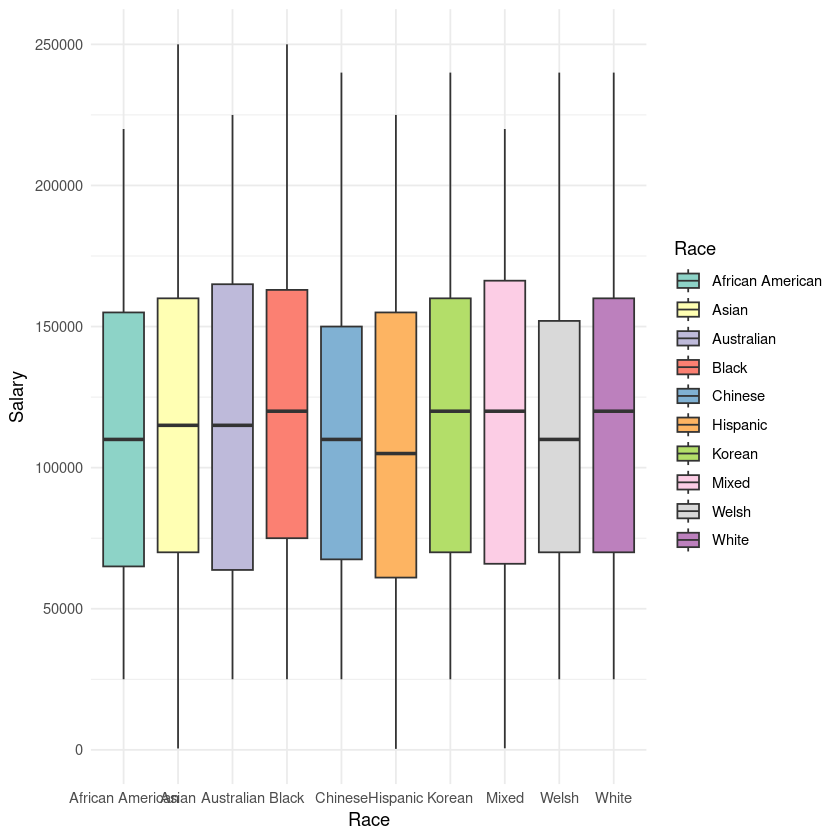

In [5]:
#Plotting Race/Salary
ggplot(data, aes(x = Race, y = Salary)) +
  geom_boxplot(aes(fill = Race)) +
  labs(y = "Salary", x = "Race") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set3")

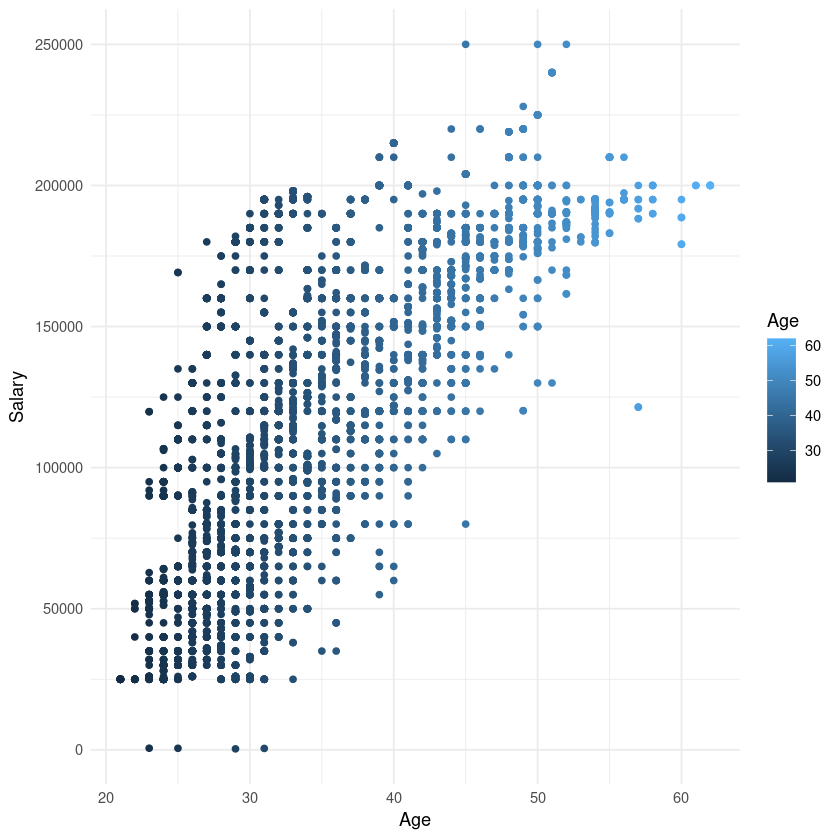

In [6]:
#Plotting Age/Salary
ggplot(data, aes(x = Age, y = Salary)) +
  geom_point(aes(color = Age)) +
  labs(y = "Salary", x = "Age") +
  theme_minimal() 

In [7]:
# Looking at key relationships
options(scipen=999) #so we can see the zeros
attach(data)

# Define the formula for the regression model
formula <- Salary ~ Gender * Country 

# Train the linear regression model using the training data
model <- train(formula, data = data, method = "lm")

# Display the summary of the model
summary(model)

The following objects are masked from data (pos = 3):

    Age, Country, Education.Level, Gender, Job.Title, Race, Salary,
    Senior, Years.of.Experience





Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-121627  -47206    -343   46018  126018 

Coefficients:
                           Estimate Std. Error t value             Pr(>|t|)    
(Intercept)                107913.6     2114.0  51.048 < 0.0000000000000002 ***
GenderMale                  12983.2     2876.5   4.513           0.00000649 ***
CountryCanada               -1028.9     3030.4  -0.340                0.734    
CountryChina                 3377.6     3018.5   1.119                0.263    
CountryUK                     543.1     2995.7   0.181                0.856    
CountryUSA                  -2920.9     2985.9  -0.978                0.328    
`GenderMale:CountryCanada`   4114.2     4086.2   1.007                0.314    
`GenderMale:CountryChina`   -4048.1     4072.5  -0.994                0.320    
`GenderMale:CountryUK`        766.5     4071.2   0.188                0.851    
`GenderMale:CountryUSA`      1707.2     4053.

In [8]:
# Looking at key relationships
options(scipen=999) #so we can see the zeros
attach(data)

# Define the formula for the regression model
formula <- Salary ~ Race * Gender + Country 

# Train the linear regression model using the training data
model <- train(formula, data = data, method = "lm")

# Display the summary of the model
summary(model)


The following objects are masked from data (pos = 3):

    Age, Country, Education.Level, Gender, Job.Title, Race, Salary,
    Senior, Years.of.Experience


The following objects are masked from data (pos = 4):

    Age, Country, Education.Level, Gender, Job.Title, Race, Salary,
    Senior, Years.of.Experience





Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-122073  -46990    -394   45949  127959 

Coefficients:
                             Estimate Std. Error t value            Pr(>|t|)
(Intercept)                 103989.02    5032.55  20.663 <0.0000000000000002
RaceAsian                     2129.30    5004.88   0.425              0.6705
RaceAustralian                4255.99    6201.65   0.686              0.4926
RaceBlack                     4686.90    6293.18   0.745              0.4564
RaceChinese                  -1611.95    6582.80  -0.245              0.8066
RaceHispanic                   941.02    6158.48   0.153              0.8786
RaceKorean                    2913.48    6488.11   0.449              0.6534
RaceMixed                     2166.78    6728.50   0.322              0.7474
RaceWelsh                     2455.25    6555.76   0.375              0.7080
RaceWhite                     4529.94    4969.65   0.912              0.362

## Feature Engineering 

In [9]:
# Including the Cost Living Index by Country
data$Cost_Living_Index <- 0
data

In [10]:
# Iterate through rows and update Cost_Living_Index based on Country
for (i in 1:nrow(data)) {
  if (data$Country[i] == "China") {
    data$Cost_Living_Index[i] <- (data$Salary[i]/(31.7))*70.4
  } else if (data$Country[i] == "Canada") {
	  data$Cost_Living_Index[i] <- (data$Salary[i]/(64.8))*70.4
  } else if (data$Country[i] == "Australia") {
	  data$Cost_Living_Index[i] <- (data$Salary[i]/(70.2))*70.4
  } else if (data$Country[i] == "USA") {
	  data$Cost_Living_Index[i] <- (data$Salary[i]/(70.4))*70.4
  } else {
   	  data$Cost_Living_Index[i] <- (data$Salary[i]/(62))*70.4
  }
}
#Data of cost of living index: https://www.numbeo.com/cost-of-living/rankings_by_country.jsp?title=2024-mid&displayColumn=0
data

In [11]:
data$Cost_Living_Index <- round(data$Cost_Living_Index)

data

Age,Gender,Education.Level,Job.Title,Years.of.Experience,Salary,Country,Race,Senior,Cost_Living_Index
<int>,<chr>,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>
32,Male,1,Software Engineer,5,90000,UK,White,0,102194
28,Female,2,Data Analyst,3,65000,USA,Hispanic,0,65000
45,Male,3,Manager,15,150000,Canada,White,1,162963
36,Female,1,Sales Associate,7,60000,USA,Hispanic,0,60000
52,Male,2,Director,20,200000,USA,Asian,0,200000
29,Male,1,Marketing Analyst,2,55000,USA,Hispanic,0,55000
42,Female,2,Product Manager,12,120000,USA,Asian,0,120000
31,Male,1,Sales Manager,4,80000,China,Korean,0,177666
26,Female,1,Marketing Coordinator,1,45000,China,Chinese,0,99937


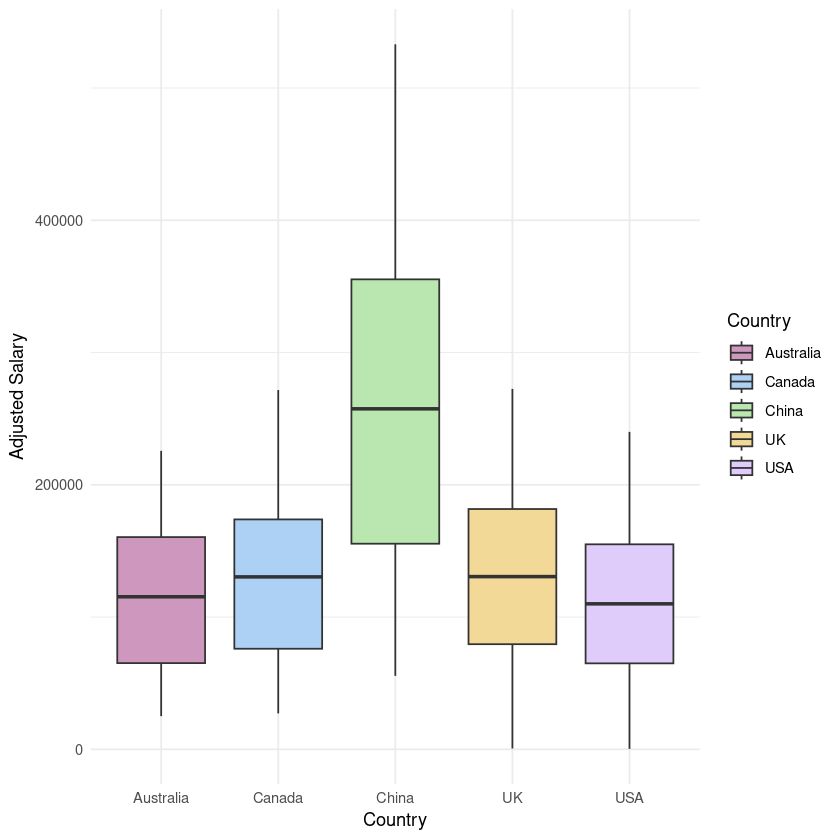

In [12]:
#Plotting Country/Salary
# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997", "#DFCCFB")

ggplot(data, aes(x = Country, y = Cost_Living_Index)) +
  geom_boxplot(aes(fill = Country)) +
  labs(y = "Adjusted Salary", x = "Country") +
  theme_minimal() +
  scale_fill_manual(values = bar_colors)

In [14]:
# Original Model for Linear Regression, after assessment of the Xs and Y we removed some Xs. To create this model which is our original model.
MainLM <- lm(Cost_Living_Index~ Age + Gender + Country + Senior + Education.Level, data = data)
summary(MainLM)


Call:
lm(formula = Cost_Living_Index ~ Age + Gender + Country + Senior + 
    Education.Level, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-183353  -26004   -5488   20027  207783 

Coefficients:
                Estimate Std. Error t value             Pr(>|t|)    
(Intercept)     -90653.5     3096.6 -29.275 < 0.0000000000000002 ***
Age               4854.9      101.3  47.907 < 0.0000000000000002 ***
GenderMale        6899.8     1211.8   5.694       0.000000012955 ***
CountryCanada     9831.1     1896.2   5.185       0.000000222724 ***
CountryChina    140620.8     1890.2  74.393 < 0.0000000000000002 ***
CountryUK        13521.3     1892.7   7.144       0.000000000001 ***
CountryUSA        -871.0     1884.1  -0.462                0.644    
Senior           -9991.6     1817.9  -5.496       0.000000040258 ***
Education.Level  25531.4      851.5  29.984 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

In [15]:
#Did a bptest for the main model
lmtest:: bptest(MainLM)


	studentized Breusch-Pagan test

data:  MainLM
BP = 1540.1, df = 8, p-value < 0.00000000000000022


[1] 0.000000000003113449

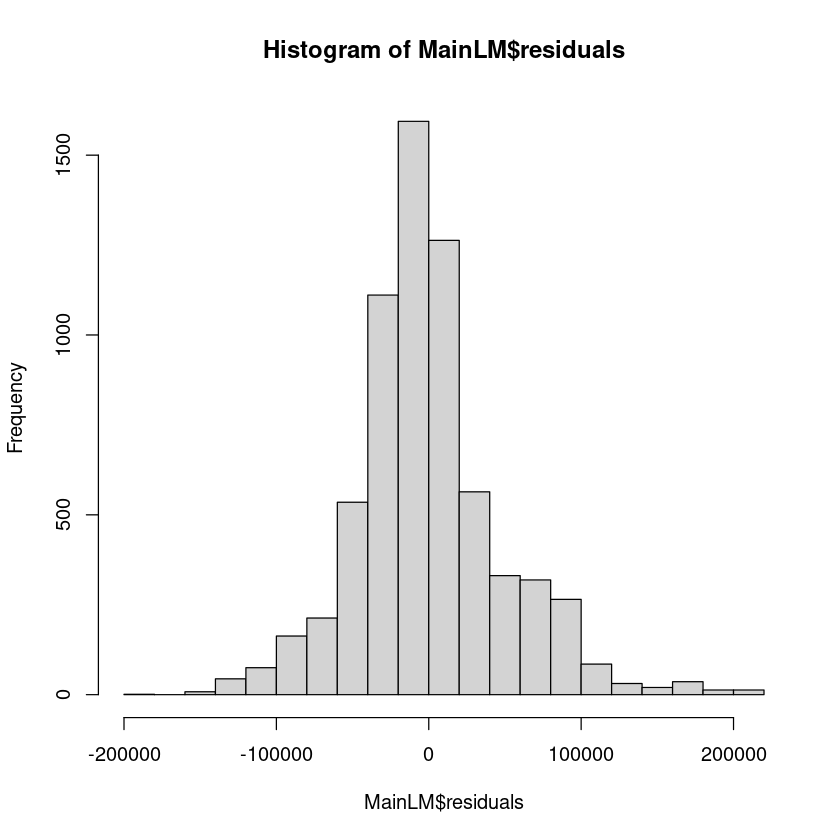

In [16]:
#Created a histogram to of the main residuals. After doing this we see the skewness of the model
hist(MainLM$residuals)
mean(MainLM$residuals)

In [17]:
#Step wise regression
fit <- lm(Cost_Living_Index ~ Age + Gender+ Education.Level + Job.Title + Years.of.Experience + Salary + Country + Race + Senior, data = data)
fit_step<-step(fit, direction="both")
summary(fit_step)

Start:  AIC=135168.5
Cost_Living_Index ~ Age + Gender + Education.Level + Job.Title + 
    Years.of.Experience + Salary + Country + Race + Senior

                       Df     Sum of Sq            RSS    AIC
- Job.Title           128   78954705787  3955151395703 135047
- Years.of.Experience   1      13837814  3876210527730 135166
- Education.Level       1      15858237  3876212548152 135166
- Age                   1     106359510  3876303049425 135167
- Senior                1     292149570  3876488839485 135167
<none>                                   3876196689915 135168
- Gender                1    1596155834  3877792845749 135169
- Race                  9   19051688291  3895248378206 135183
- Salary                1 5431343490458  9307540180373 141021
- Country               4 6668320525872 10544517215787 141849

Step:  AIC=135047.2
Cost_Living_Index ~ Age + Gender + Education.Level + Years.of.Experience + 
    Salary + Country + Race + Senior

                       Df     Sum of


Call:
lm(formula = Cost_Living_Index ~ Gender + Salary + Country + 
    Race, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-90372 -10990     17  11283 121480 

Coefficients:
                    Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)    -30844.334327   1927.127484 -16.005 < 0.0000000000000002 ***
GenderMale       -972.952381    604.270125  -1.610               0.1074    
Salary              1.280641      0.005696 224.851 < 0.0000000000000002 ***
CountryCanada    9617.885679   1158.309450   8.303 < 0.0000000000000002 ***
CountryChina   145526.427665   1499.061205  97.078 < 0.0000000000000002 ***
CountryUK       15002.168701   1251.254573  11.990 < 0.0000000000000002 ***
CountryUSA       -131.628124   1242.584905  -0.106               0.9156    
RaceAsian        -521.689823   1659.588388  -0.314               0.7533    
RaceAustralian   -366.710620   2131.579597  -0.172               0.8634    
RaceBlack       -1228.917492   2142.764928  -0.57


Call:
lm(formula = Cost_Living_Index ~ Gender + Salary + Country + 
    Race, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
-90372 -10990     17  11283 121480 

Coefficients:
                    Estimate    Std. Error t value             Pr(>|t|)    
(Intercept)    -30844.334327   1927.127484 -16.005 < 0.0000000000000002 ***
GenderMale       -972.952381    604.270125  -1.610               0.1074    
Salary              1.280641      0.005696 224.851 < 0.0000000000000002 ***
CountryCanada    9617.885679   1158.309450   8.303 < 0.0000000000000002 ***
CountryChina   145526.427665   1499.061205  97.078 < 0.0000000000000002 ***
CountryUK       15002.168701   1251.254573  11.990 < 0.0000000000000002 ***
CountryUSA       -131.628124   1242.584905  -0.106               0.9156    
RaceAsian        -521.689823   1659.588388  -0.314               0.7533    
RaceAustralian   -366.710620   2131.579597  -0.172               0.8634    
RaceBlack       -1228.917492   2142.764928  -0.57

[1] -0.0000000000001024136

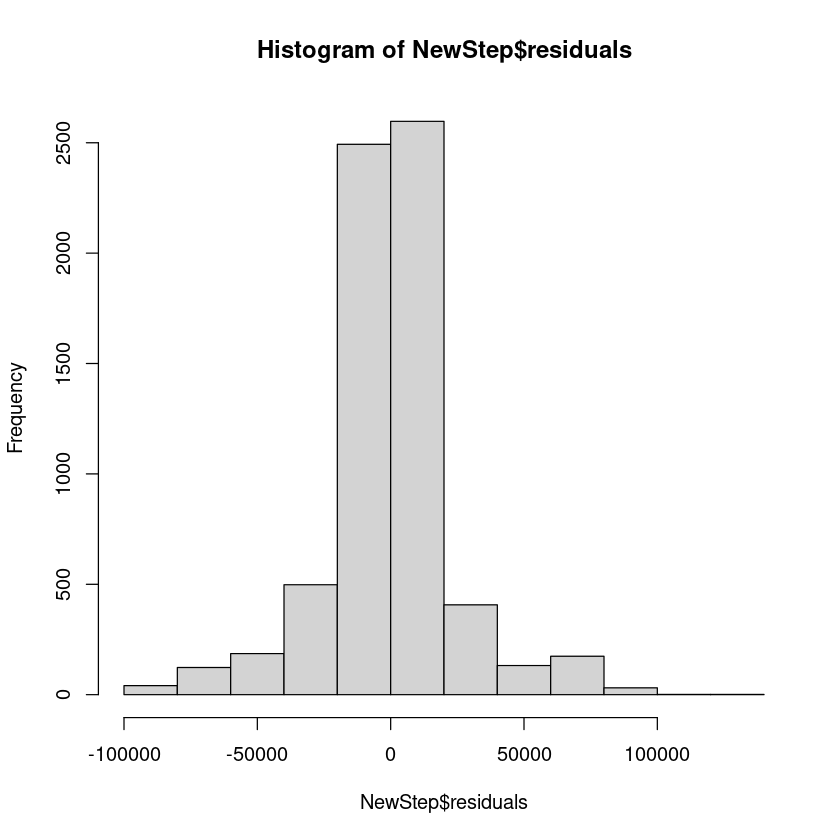

In [18]:
## Going off of the Step Regression, we created a new model to use what it suggested ;however, after looking at vif there is multicollinarity between Country and Race. When taking this out of the formula, it causes the Adjusted R-Squared to decrease severely, no longer making it a usable model.

NewStep <- lm(Cost_Living_Index ~ Gender + Salary + Country + Race, data = data)
summary(NewStep)
hist(NewStep$residuals)
mean(NewStep$residuals)

In [19]:
#autoplot(NewStep)

In [20]:
car :: vif(NewStep)

,GVIF,Df,GVIF^(1/(2*Df))
Gender,1.018266,1,1.009092
Salary,1.018753,1,1.009333
Country,16.500487,4,1.419669
Race,16.531274,9,1.168648


In [21]:
lmtest:: bptest(NewStep)


	studentized Breusch-Pagan test

data:  NewStep
BP = 2973.2, df = 15, p-value < 0.00000000000000022


In [22]:
# Tried this exponential regression model to fix some residuals
ExpModel <- lm(log(Cost_Living_Index) ~ Age + Gender + Country + Senior + Education.Level, data = data)
summary(ExpModel)


Call:
lm(formula = log(Cost_Living_Index) ~ Age + Gender + Country + 
    Senior + Education.Level, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4003 -0.2240 -0.0091  0.2086  0.9019 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      9.981997   0.024080 414.543 < 0.0000000000000002 ***
Age              0.032766   0.000788  41.580 < 0.0000000000000002 ***
GenderMale       0.085814   0.009423   9.107 < 0.0000000000000002 ***
CountryCanada    0.087604   0.014745   5.941  0.00000000297052350 ***
CountryChina     0.805449   0.014699  54.797 < 0.0000000000000002 ***
CountryUK        0.114925   0.014718   7.808  0.00000000000000668 ***
CountryUSA      -0.005769   0.014651  -0.394              0.69375    
Senior          -0.041082   0.014136  -2.906              0.00367 ** 
Education.Level  0.245973   0.006621  37.148 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual 

In [23]:
# Tried this semilog regression model to fix some residuals
SemiLogModel <- lm(log(Cost_Living_Index) ~ Age + Gender + Country + Senior + Education.Level, data = data)
summary(SemiLogModel)


Call:
lm(formula = log(Cost_Living_Index) ~ Age + Gender + Country + 
    Senior + Education.Level, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4003 -0.2240 -0.0091  0.2086  0.9019 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      9.981997   0.024080 414.543 < 0.0000000000000002 ***
Age              0.032766   0.000788  41.580 < 0.0000000000000002 ***
GenderMale       0.085814   0.009423   9.107 < 0.0000000000000002 ***
CountryCanada    0.087604   0.014745   5.941  0.00000000297052350 ***
CountryChina     0.805449   0.014699  54.797 < 0.0000000000000002 ***
CountryUK        0.114925   0.014718   7.808  0.00000000000000668 ***
CountryUSA      -0.005769   0.014651  -0.394              0.69375    
Senior          -0.041082   0.014136  -2.906              0.00367 ** 
Education.Level  0.245973   0.006621  37.148 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual 

In [24]:
# Tried this loglog regression model to fix some residuals
LogLogModel <- lm(log(Cost_Living_Index) ~ log(Age) + Gender + Country + Senior + Education.Level, data = data)
summary(LogLogModel)


Call:
lm(formula = log(Cost_Living_Index) ~ log(Age) + Gender + Country + 
    Senior + Education.Level, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4044 -0.2185 -0.0181  0.1928  0.9131 

Coefficients:
                 Estimate Std. Error t value             Pr(>|t|)    
(Intercept)      6.645936   0.090086  73.773 < 0.0000000000000002 ***
log(Age)         1.280633   0.027517  46.540 < 0.0000000000000002 ***
GenderMale       0.082498   0.009184   8.982 < 0.0000000000000002 ***
CountryCanada    0.087385   0.014376   6.079  0.00000000127926485 ***
CountryChina     0.804036   0.014331  56.105 < 0.0000000000000002 ***
CountryUK        0.114695   0.014350   7.993  0.00000000000000154 ***
CountryUSA      -0.006643   0.014284  -0.465                0.642    
Senior          -0.057938   0.013807  -4.196  0.00002749297370880 ***
Education.Level  0.228231   0.006500  35.110 < 0.0000000000000002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Resi

In [25]:
#We selected loglogmodel as the final base model and decided to add interaction
LogLogModel <- lm(log(Cost_Living_Index) ~ log(Age) + Gender + Country + Senior + Education.Level + Gender*Country, data = data)
summary(LogLogModel)


Call:
lm(formula = log(Cost_Living_Index) ~ log(Age) + Gender + Country + 
    Senior + Education.Level + Gender * Country, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4057 -0.2198 -0.0192  0.1926  0.9118 

Coefficients:
                          Estimate Std. Error t value             Pr(>|t|)    
(Intercept)               6.651560   0.090596  73.420 < 0.0000000000000002 ***
log(Age)                  1.280785   0.027534  46.516 < 0.0000000000000002 ***
GenderMale                0.071188   0.020390   3.491             0.000484 ***
CountryCanada             0.075192   0.021437   3.508             0.000455 ***
CountryChina              0.794013   0.021360  37.173 < 0.0000000000000002 ***
CountryUK                 0.113668   0.021194   5.363         0.0000000845 ***
CountryUSA               -0.014340   0.021124  -0.679             0.497259    
Senior                   -0.057922   0.013812  -4.194         0.0000278045 ***
Education.Level           0.228202   0.006

The following package(s) will be installed:
- ggfortify [0.4.17]
These packages will be installed into "~/renv/library/linux-ubuntu-jammy/R-4.4/x86_64-pc-linux-gnu".

# Installing packages --------------------------------------------------------
- Installing ggfortify ...                      OK [linked from cache]


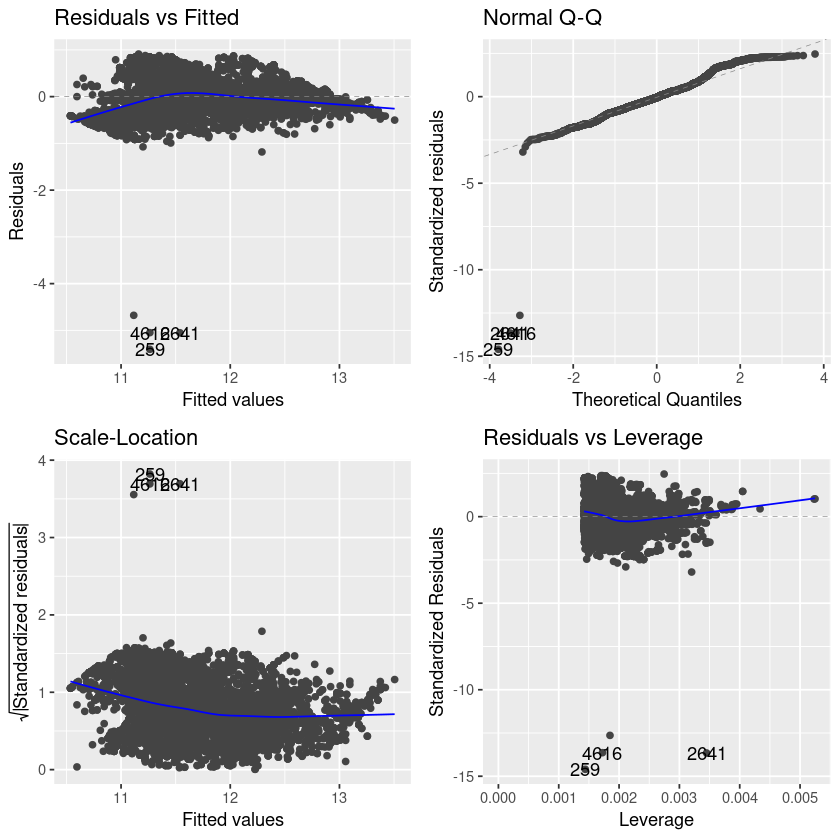

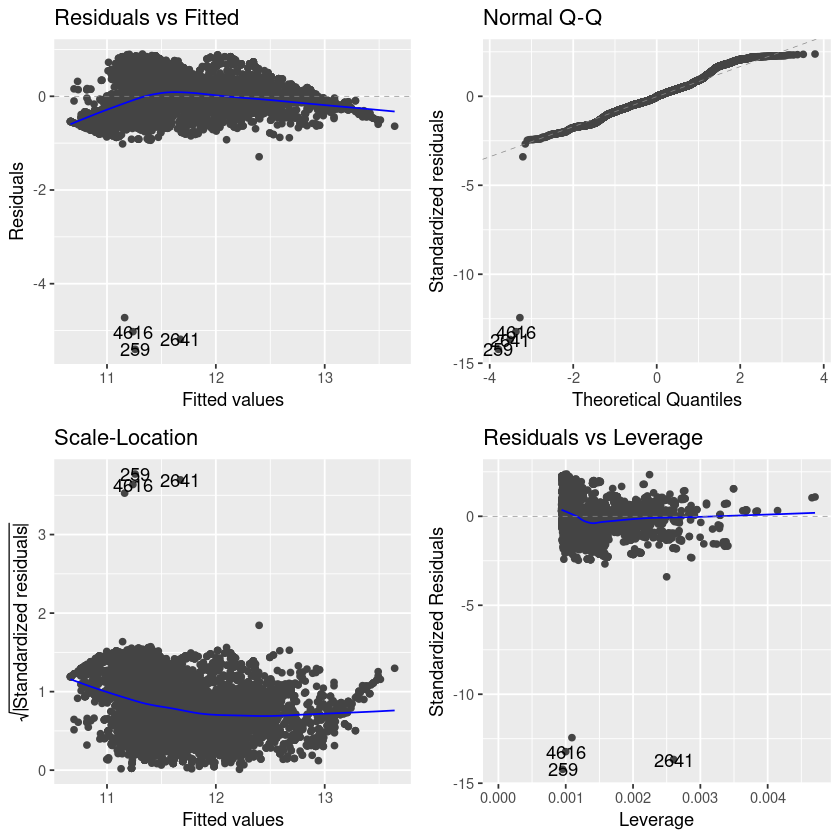

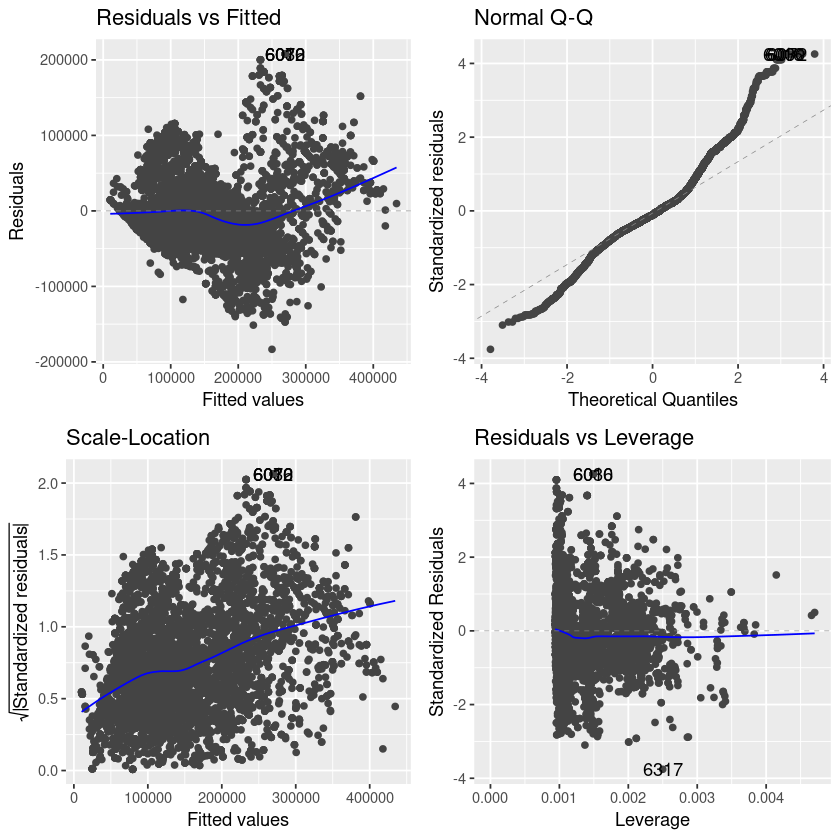

In [26]:
#Created an autoplot of the new model used to fix residuals
install.packages("ggfortify")
library(ggfortify)

autoplot(LogLogModel)

autoplot(ExpModel)

autoplot(MainLM)

In [27]:
#Looking at the real R values after transforming them back with each model
nolog<-cor(MainLM$fitted.values,data$Cost_Living_Index)^2;nolog

yhatLL<-exp(LogLogModel$fitted.values)
loglogr2<-cor(yhatLL,data$Cost_Living_Index)^2;loglogr2

yhatE<-exp(ExpModel$fitted.values)
expr2<-cor(yhatE,data$Cost_Living_Index)^2;expr2

logXR2<-cor(SemiLogModel$fitted.values,data$Cost_Living_Index)^2;logXR2

[1] 0.7093605

[1] 0.6951042

[1] 0.671895

[1] 0.6859447

[1] 143562.9

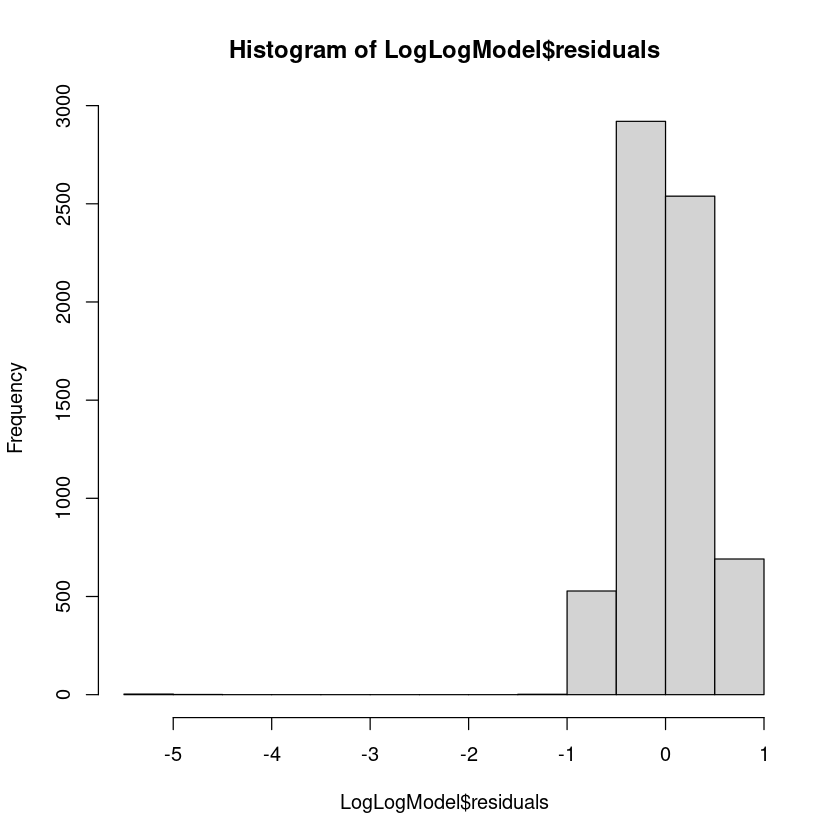

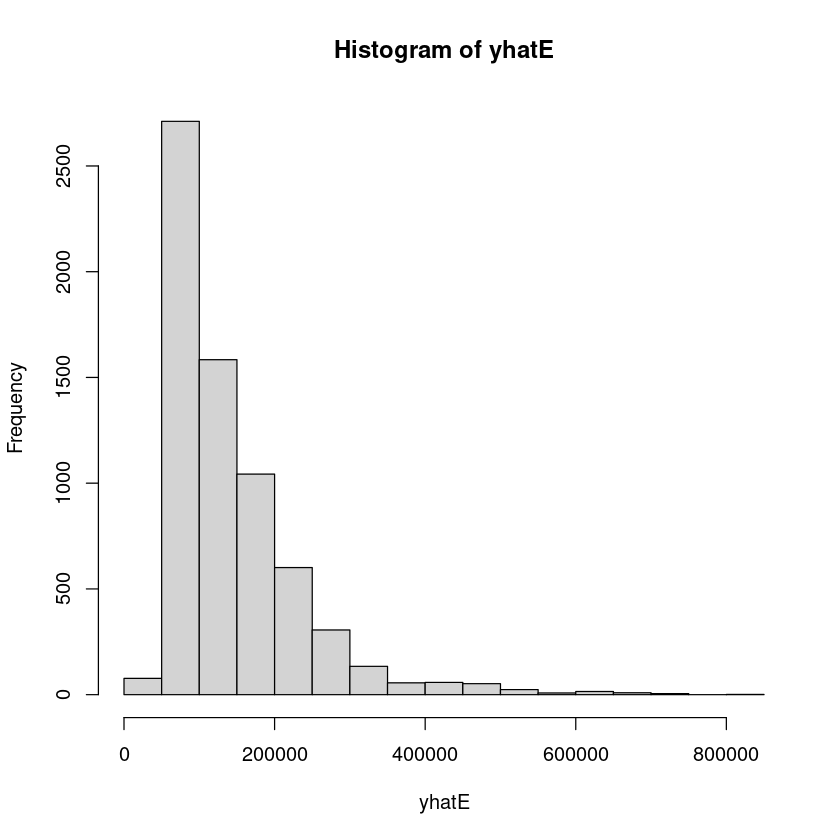

In [28]:
# Graphing a histogram of the Loglog model and the residuals
hist(LogLogModel$residuals)
mean(yhatLL)

hist(yhatE)

In [29]:
#Conducted a Breusch-Pagan Test for all models
bptest(ExpModel)
bptest(LogLogModel)


	studentized Breusch-Pagan test

data:  ExpModel
BP = 76.369, df = 8, p-value = 0.0000000000002622



	studentized Breusch-Pagan test

data:  LogLogModel
BP = 78.032, df = 12, p-value = 0.000000000009781


In [30]:
# Load the necessary library
library(car)

# Checking for multicollinearity. Which we do not have any in our final model.
vif_values <- vif(LogLogModel)

# Display the VIF values
vif_values

Loading required package: carData

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
log(Age),1.690451,1,1.300174
Gender,5.010769,1,2.238475
Country,24.297716,4,1.490032
Senior,1.141277,1,1.068306
Education.Level,1.596258,1,1.263431
Gender:Country,69.072445,4,1.697904


In [31]:
#Trying to do a sample prediction with Q
Quentin <- data.frame(Age = 23, Gender = 'Male', Country = 'USA', Senior = 0, Education.Level= 2)

predictionqu <- predict(LogLogModel, newdata = Quentin)
print(exp(predictionqu))

# Doing a sample prediction with Morgan
Morgan <- data.frame(Age =22, Gender='Female', Country='USA', Senior=0, Education.Level=2)

predictionsmu <- predict(LogLogModel, newdata = Morgan)
print(exp(predictionsmu))

# Doing a sample prediction with Micah
Micah <- data.frame(Age =25, Gender='Female', Country='USA', Senior=0, Education.Level=2)

predictionsmiu <- predict(LogLogModel, newdata = Micah)
print(exp(predictionsmiu))

# Doing a sample prediction with Tony
Tony <- data.frame(Age =29, Gender='Male', Country='USA', Senior=0, Education.Level=2)

predictionstu <- predict(LogLogModel, newdata = Tony)
print(exp(predictionstu))

      1 
72760.8 
       1 
63106.89 
       1 
74333.15 
       1 
97911.64 


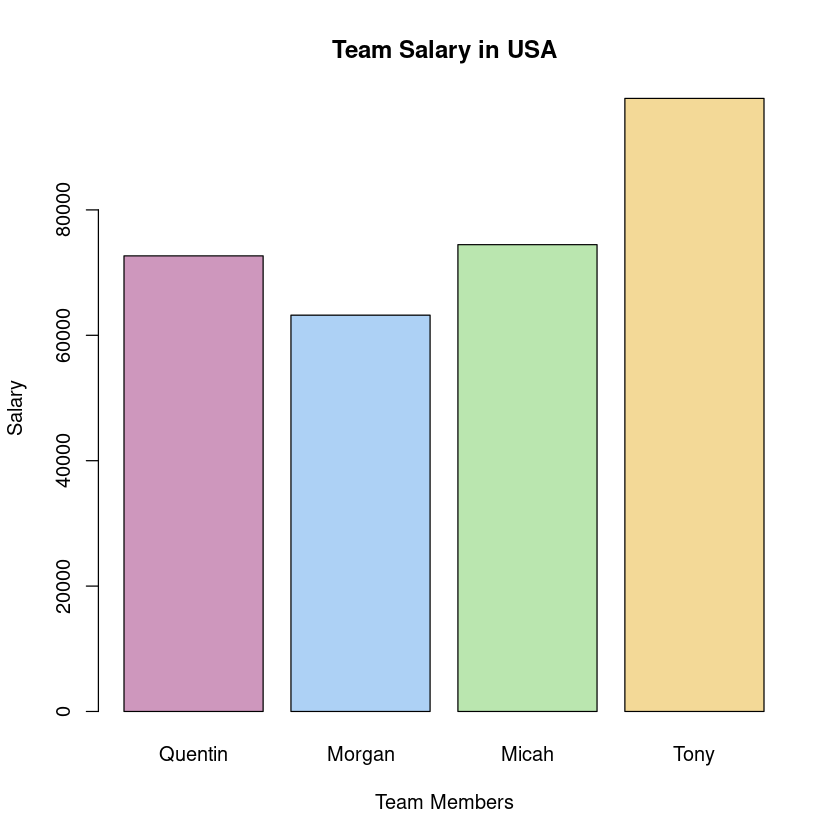

In [32]:
# Combine the predictions into a single vector
predictionu <- c(72669.13 , 63211.86 , 74455.36 , 97784.85)

# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997")

# Create a histogram of the predictions with each bar having its own section and color
barplot(predictionu, main = "Team Salary in USA", names.arg = c("Quentin", "Morgan", "Micah", "Tony"), col = bar_colors, border = "black", xlab = "Team Members", ylab = "Salary")

In [33]:
#Trying to do a sample prediction with Q
Quentin <- data.frame(Age = 23, Gender = 'Male', Country = 'China', Senior = 0, Education.Level= 2)

predictionqu <- predict(LogLogModel, newdata = Quentin)
print(exp(predictionqu))

# Doing a sample prediction with Morgan
Morgan <- data.frame(Age =22, Gender='Female', Country='China', Senior=0, Education.Level=2)

predictionsmu <- predict(LogLogModel, newdata = Morgan)
print(exp(predictionsmu))

# Doing a sample prediction with Micah
Micah <- data.frame(Age =25, Gender='Female', Country='China', Senior=0, Education.Level=2)

predictionsmiu <- predict(LogLogModel, newdata = Micah)
print(exp(predictionsmiu))

# Doing a sample prediction with Tony
Tony <- data.frame(Age =29, Gender='Male', Country='China', Senior=0, Education.Level=2)

predictionstu <- predict(LogLogModel, newdata = Tony)
print(exp(predictionstu))

       1 
163959.5 
       1 
141625.1 
       1 
166819.2 
       1 
220634.5 


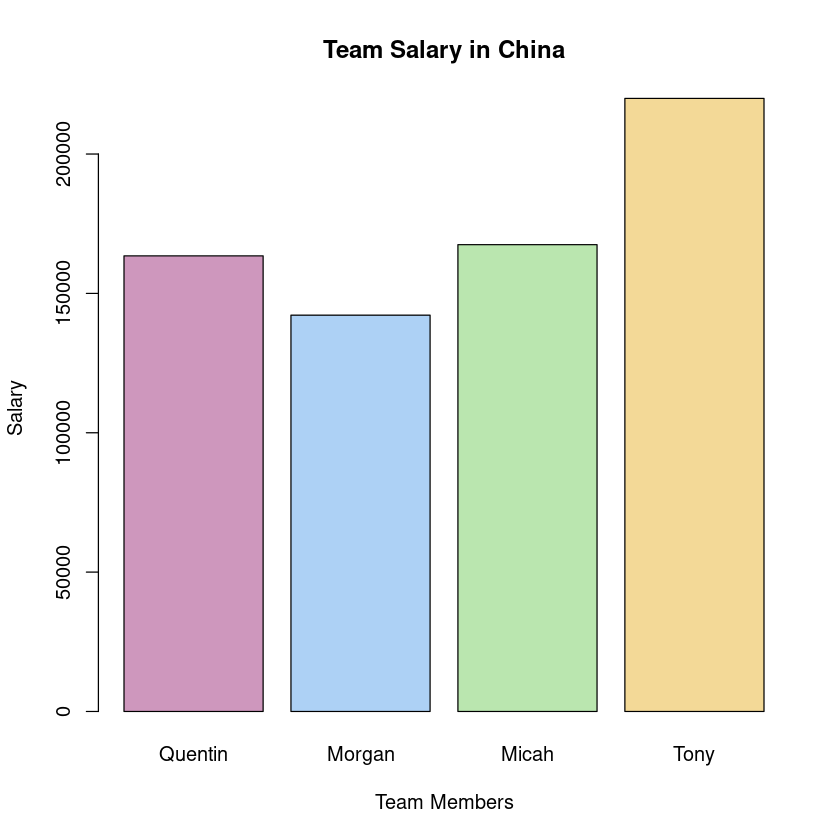

In [34]:
# Combine the predictions into a single vector
predictionu <- c(163464.5, 142191 , 167482.5 , 219960.7)

# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997")

# Create a histogram of the predictions with each bar having its own section
barplot(predictionu, main = "Team Salary in China", names.arg = c("Quentin", "Morgan", "Micah", "Tony"), col = bar_colors, border = "black", xlab = "Team Members", ylab = "Salary")

In [35]:
#Trying to do a sample prediction with Q
Quentin <- data.frame(Age = 23, Gender = 'Male', Country = 'Australia', Senior = 0, Education.Level= 2)

predictionqu <- predict(LogLogModel, newdata = Quentin)
print(exp(predictionqu))

# Doing a sample prediction with Morgan
Morgan <- data.frame(Age =22, Gender='Female', Country='Australia', Senior=0, Education.Level=2)

predictionsmu <- predict(LogLogModel, newdata = Morgan)
print(exp(predictionsmu))

#Doing a sample prediction with Micah 
Micah <- data.frame(Age =25, Gender='Female', Country='Australia', Senior=0, Education.Level=2)  

predictionsmiu <- predict(LogLogModel, newdata = Micah) 
print(exp(predictionsmiu))

# Doing a sample prediction with Tony
Tony <- data.frame(Age =29, Gender='Male', Country='Australia', Senior=0, Education.Level=2)

predictionstu <- predict(LogLogModel, newdata = Tony)
print(exp(predictionstu))

       1 
72769.07 
       1 
64018.38 
       1 
75406.79 
       1 
97922.76 


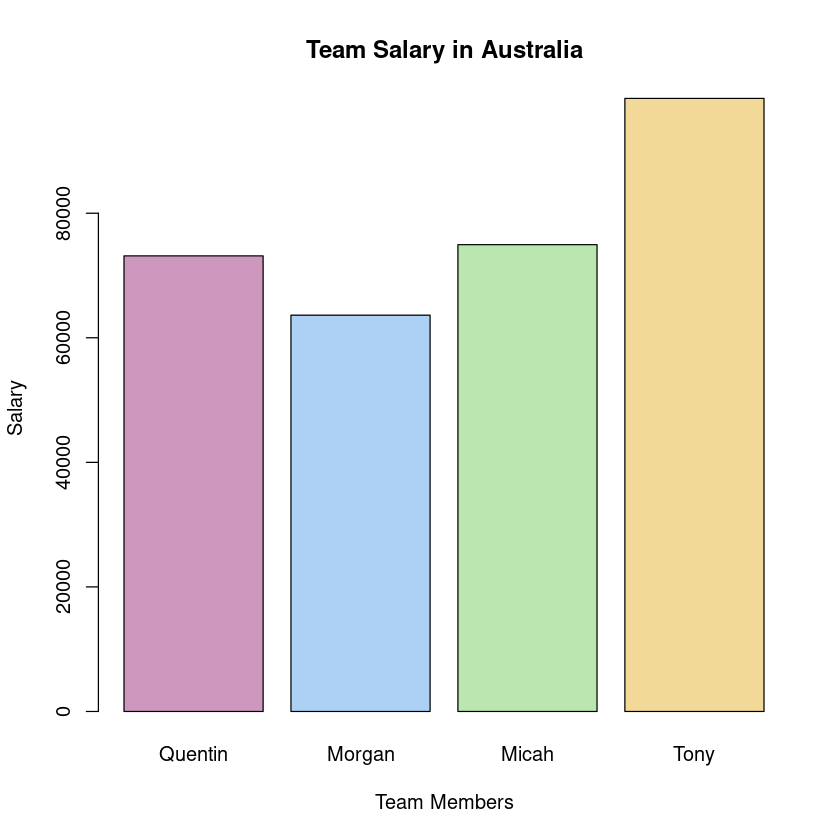

In [36]:
# Combine the predictions into a single vector
predictionu <- c(73153.5, 63633.2 , 74951.63, 98436.62)

# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997")

# Create a histogram of the predictions with each bar having its own section
barplot(predictionu, main = "Team Salary in Australia", names.arg = c("Quentin", "Morgan", "Micah", "Tony"), col = bar_colors, border = "black", xlab = "Team Members", ylab = "Salary")

In [37]:
#Trying to do a sample prediction with Q
Quentin <- data.frame(Age = 23, Gender = 'Male', Country = 'Canada', Senior = 0, Education.Level= 2)

predictionqu <- predict(LogLogModel, newdata = Quentin)
print(exp(predictionqu))

# Doing a sample prediction with Morgan
Morgan <- data.frame(Age =22, Gender='Female', Country='Canada', Senior=0, Education.Level=2)

predictionsmu <- predict(LogLogModel, newdata = Morgan)
print(exp(predictionsmu))

#Doing a sample prediction with Micah 
Micah <- data.frame(Age =25, Gender='Female', Country='Canada', Senior=0, Education.Level=2)  

predictionsmiu <- predict(LogLogModel, newdata = Micah) 
print(exp(predictionsmiu))

# Doing a sample prediction with Tony
Tony <- data.frame(Age =29, Gender='Male', Country='Canada', Senior=0, Education.Level=2)

predictionstu <- predict(LogLogModel, newdata = Tony)
print(exp(predictionstu))

       1 
80211.17 
       1 
69017.65 
      1 
81295.4 
       1 
107937.3 


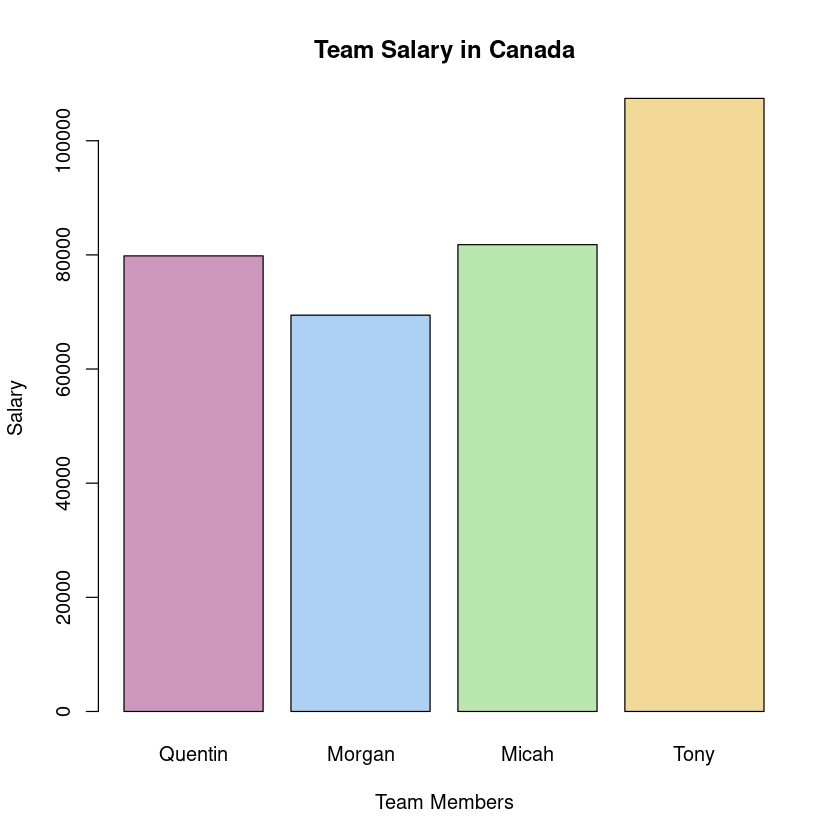

In [38]:
# Combine the predictions into a single vector
predictionu <- c(79833.66 , 69443.99, 81795.99, 107425.6)

# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997")

# Create a histogram of the predictions with each bar having its own section
barplot(predictionu, main = "Team Salary in Canada", names.arg = c("Quentin", "Morgan", "Micah", "Tony"), col = bar_colors, border = "black", xlab = "Team Members", ylab = "Salary")

In [39]:
# Trying to do a sample prediction with Quentin
Quentin <- data.frame(Age = 23, Gender = 'Male', Country = 'UK', Senior = 0, Education.Level = 2)

predictionqu <- predict(LogLogModel, newdata = Quentin)
print(exp(predictionqu))

# Doing a sample prediction with Morgan
Morgan <- data.frame(Age = 22, Gender = 'Female', Country = 'UK', Senior = 0, Education.Level = 2)

predictionsmu <- predict(LogLogModel, newdata = Morgan)
print(exp(predictionsmu))

# Doing a sample prediction with Micah 
Micah <- data.frame(Age = 25, Gender = 'Female', Country = 'UK', Senior = 0, Education.Level = 2)  

predictionsmiu <- predict(LogLogModel, newdata = Micah) 
print(exp(predictionsmiu))

# Doing a sample prediction with Tony
Tony <- data.frame(Age = 29, Gender = 'Male', Country = 'UK', Senior = 0, Education.Level = 2)

predictionstu <- predict(LogLogModel, newdata = Tony)
print(exp(predictionstu))

       1 
81688.07 
      1 
71724.9 
       1 
84484.24 
       1 
109924.7 


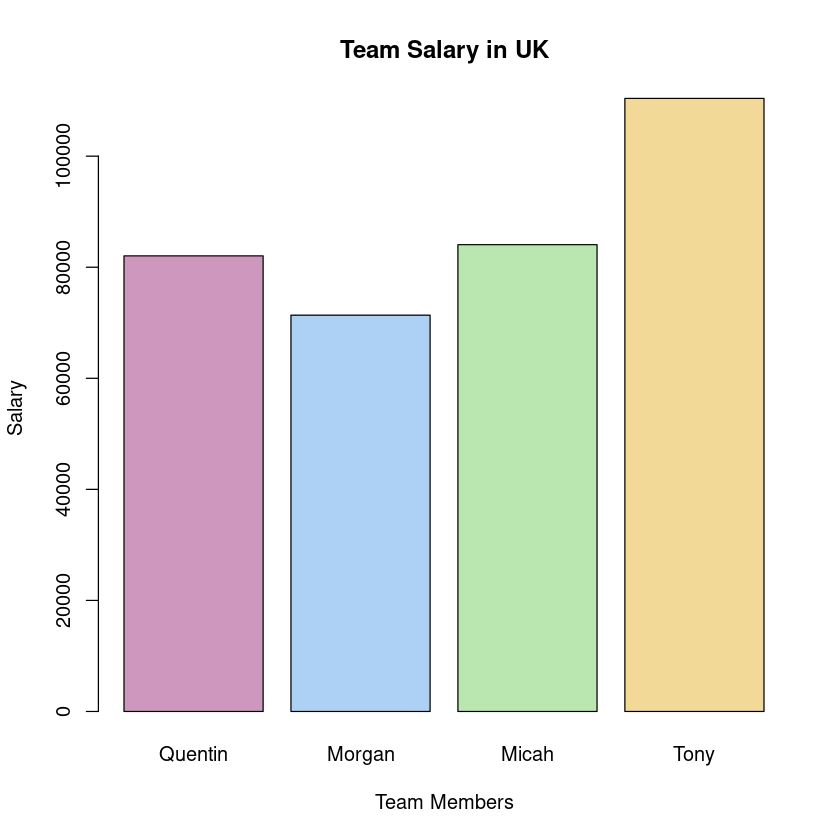

In [40]:
# Combine the predictions into a single vector
predictionu <- c(82043.92 , 71366.6, 84060.58, 110399.7)

# Define colors for each bar
bar_colors <- c("#ce97bd", '#add1f5', "#bae6af", "#f3d997")

# Create a histogram of the predictions with each bar having its own section
barplot(predictionu, main = "Team Salary in UK", names.arg = c("Quentin", "Morgan", "Micah", "Tony"), col = bar_colors, border = "black", xlab = "Team Members", ylab = "Salary")

In [41]:
#Sample People
# Trying to do a sample prediction with John/ Highschool
John <- data.frame(Age = 17, Gender = 'Male', Country = 'USA', Senior = 0, Education.Level = 0)
j1 <- predict(LogLogModel, newdata = John)
print(exp(j1))
# Doing a sample prediction with Mary/ Highschool
Mary <- data.frame(Age = 17, Gender = 'Female', Country = 'USA', Senior = 0, Education.Level = 0)
m1 <- predict(LogLogModel, newdata = Mary)
print(exp(m1))

# Doing a sample prediction with John/ Bachlors
John <- data.frame(Age = 22, Gender = 'Male', Country = 'USA', Senior = 0, Education.Level = 1)
j2 <- predict(LogLogModel, newdata = John)
print(exp(j2))
# Doing a sample prediction with Mary/ Bachelors
Mary <- data.frame(Age = 22, Gender = 'Female', Country = 'USA', Senior = 0, Education.Level = 1)
m2 <- predict(LogLogModel, newdata = Mary)
print(exp(m2))

# Doing a sample prediction with John/ Masters
John <- data.frame(Age = 23, Gender = 'Male', Country = 'USA', Senior = 0, Education.Level = 2)
j3 <- predict(LogLogModel, newdata = John)
print(exp(j3))
# Doing a sample prediction with Mary/ Bachelors
Mary <- data.frame(Age = 23, Gender = 'Female', Country = 'USA', Senior = 0, Education.Level = 2)
m3 <- predict(LogLogModel, newdata = Mary)
print(exp(m3))

# Doing a sample prediction with John/ PHD
John <- data.frame(Age = 23, Gender = 'Male', Country = 'USA', Senior = 0, Education.Level = 3)
j4 <- predict(LogLogModel, newdata = John)
print(exp(j4))
# Doing a sample prediction with Mary/ PHD
Mary <- data.frame(Age = 23, Gender = 'Female', Country = 'USA', Senior = 0, Education.Level = 3)
m4 <- predict(LogLogModel, newdata = Mary)
print(exp(m4))

       1 
31299.93 
       1 
28737.46 
       1 
54709.74 
       1 
50230.76 
      1 
72760.8 
       1 
66804.01 
       1 
91412.28 
       1 
83928.52 


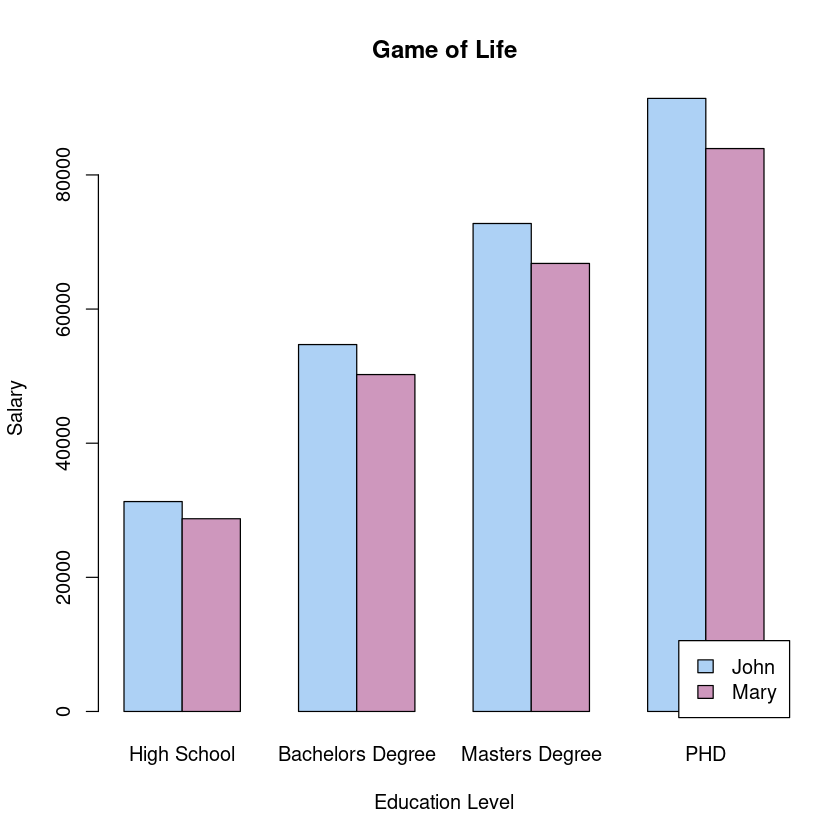

In [66]:
# Combine the predictions for two people into separate vectors
prediction_high <- c(31299.93, 28737.46)
prediction_bach <- c(54709.74, 50230.76)
mast <- c(72760.8, 66804.01)
phd <- c(91412.28 , 83928.52)

# Define colors for each bar
bar_colors <- c('#add1f5', '#ce97bd')

# Create a matrix of the predictions
predictions_matrix <- rbind(prediction_high, prediction_bach, mast, phd)

# Create a double bar chart
barplot(t(predictions_matrix), beside = TRUE, main = "Game of Life", 
        names.arg = c("High School", "Bachelors Degree", "Masters Degree", "PHD"), 
        col = bar_colors, border = "black", xlab = "Education Level", ylab = "Salary", 
        legend.text = c("John", "Mary"), args.legend = list(x = "bottomright"))

In [35]:
# Doing a sample prediction we did with James our EP. He loved our idea and the way we were going to present it. 
James <- data.frame(Age =40, Gender='Male', Country='Australia', Senior=1, Education.Level=2)

predictions <- predict(LogLogModel, newdata = James)
print(exp(predictions))

     1 
140233 


In [127]:
#Validation


trainControl<-trainControl(method = "LOOCV")


LOOCVmodel <- train(log(Cost_Living_Index) ~ log(Age) + Gender + Country + Senior + Education.Level + Gender*Country, data = data, method = "lm", trControl = trainControl)
summary(LOOCVmodel)
print(LOOCVmodel)


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4057 -0.2198 -0.0192  0.1926  0.9118 

Coefficients:
                            Estimate Std. Error t value             Pr(>|t|)
(Intercept)                 6.651560   0.090596  73.420 < 0.0000000000000002
`log(Age)`                  1.280785   0.027534  46.516 < 0.0000000000000002
GenderMale                  0.071188   0.020390   3.491             0.000484
CountryCanada               0.075192   0.021437   3.508             0.000455
CountryChina                0.794013   0.021360  37.173 < 0.0000000000000002
CountryUK                   0.113668   0.021194   5.363         0.0000000845
CountryUSA                 -0.014340   0.021124  -0.679             0.497259
Senior                     -0.057922   0.013812  -4.194         0.0000278045
Education.Level             0.228202   0.006504  35.086 < 0.0000000000000002
`GenderMale:CountryCanada`  0.022180   0.028908   0.767             0.44296

Linear Regression 

6684 samples
   5 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 6683, 6683, 6683, 6683, 6683, 6683, ... 
Resampling results:

  RMSE       Rsquared   MAE      
  0.3708816  0.6694305  0.2762822

Tuning parameter 'intercept' was held constant at a value of TRUE
